This notebook is for testing and determining isolation criteria for UCHVCs


I am returning on 9 July 2018 to start looking at this again

In [1]:
%matplotlib inline

In [2]:
import sys
#from pprint import pprint as p
#p(sys.path)

#even though I have added my python directory to path and pythonpath, it's not showing up
#so i'll add it here manually (and do this in all my future notebooks)
sys.path.append('/Users/adams/python')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
from astropy.io import ascii
from astropy import coordinates as coord
from astropy import units as u
import alfalfa
import uchvcs

In [4]:
#get candidates catalog
name='/Users/adams/data/uchvcs/catalog/spring/spring_candidates.csv'
spring_cands=alfalfa.get_cat(name)

print 'done with cands'

#and code9s for comparison:
"""In July 2018, I got the most recent 100% a grids catalog from egg.astro.cornell.edu
I create a code 9s text file, so that I don't have to read the full catalog every time
There are many more 1s and 2s than 9s, I think
I did this in notebook get_code9s"""

code9s=ascii.read('/Users/adams/data/uchvcs/catalog/code9s_cat.txt')


print 'done with code 9s'

check got hiname
check got ra,dec


check got l,b
check got vels
done with cands
check got hiname
check got ra,dec
check got l,b


ERROR: KeyboardInterrupt [astropy.coordinates.baseframe]


KeyboardInterrupt: 

In [ ]:
print code9s.colnames

In [ ]:
#also want to get just spring code9s for comparison purposes
#ind1 = np.where( code9s['RA']<270 )
#ind2=np.where(code9s['RA']> 60)
ind=np.where((code9s['RA']<270) & (code9s['RA']> 60) )
spring_code9s = code9s[ind]

In [5]:
name='/Users/adams/data/uchvcs/catalog/spring/wvw_hvc_cat_edited.txt'
tmp=ascii.read('/Users/adams/data/uchvcs/catalog/spring/wvw_hvc_cat_edited.txt')
print tmp.colnames
gl=tmp['L']
gb=tmp['B']
c=coord.Galactic(l=gl,b=gb,unit=(u.degree,u.degree))
crd = c.transform_to(coord.ICRS)
r=crd.ra.degree
d=crd.dec.degree

hiname=alfalfa.get_hiname(name)
ra,dec=alfalfa.get_radec(name)
l,b=alfalfa.get_lb(name)
cz,vlsr,vgsr,vlg,vdev=alfalfa.get_vels(name)

['Count', 'L', 'B', 'RA', 'dec', 'Vlsr', 'Vgsr', 'Vlgsr', 'Vdev', 'Vz', 'Tmax', 'N', 'Omega', 'Flux', 'err', 'ass', 'cpx', 'pop']


In [27]:
#also want WvW catalog
wvw=alfalfa.get_cat('/Users/adams/data/uchvcs/catalog/spring/wvw_hvc_cat_edited.txt')
#and all LG gals
#print wvw
#plus LG gals in ALFALFA footprint
lg=alfalfa.get_cat('/Users/adams/data/uchvcs/catalog/local_gals_positions_nov12.txt')
print lg

#get spring only local also:
lg_spring=alfalfa.get_cat('/Users/adams/data/uchvcs/catalog/local_gals_spring_positions_nov12.txt')

check got hiname
check got ra,dec
check got l,b
check got vels
check got hiname
check got ra,dec
check got l,b
check got vels
       AGC               HIname       ...        flux                 SN        
------------------ ------------------ ... ------------------ -------------------
-1.72723371102e-77 -1.72723371102e-77 ... -1.72723371102e-77  -1.72723371102e-77
2.68156175316e+154 -1.72723371102e-77 ... -1.72723371102e-77 -1.49166823821e-154
    -139.185592329 2.21547423051e-314 ...                nan                 nan
     113.759167272 2.21547982531e-314 ...             -116.5  2.20454093524e-314
    -38.9363631247 2.21547990436e-314 ...                0.0                 0.0
     150.704924524 2.21547994389e-314 ... 2.13498819968e-314   2.1228791171e-314
     52.9649706959 2.21547998341e-314 ...                0.0  1.97626258336e-323
    -51.9378831501 2.21548002294e-314 ...                0.0  1.97626258336e-323
     21.3884850865 2.21548006246e-314 ... 3.45845952089e-323  3.

In [45]:
#now I want to check isolation from WvW catalog - here is where I will have strictest criterion.
#Will look only at spring sky
#i would like to be able to add a column to spring_cands that contains the distance to nearest WvW cloud using f=0.5 ()
#note that this is just using add_col_neigh_dist with Nth=1 (default, takes closets objects)
#print spring_cands

spring_cands_wvw = alfalfa.add_col_neigh_dist(spring_cands,wvw,name='WvW')

#print spring_cands_wvw

lg_wvw = alfalfa.add_col_neigh_dist(lg,wvw,name='WvW')

lg_spring_wvw = alfalfa.add_col_neigh_dist(lg_spring,wvw,name='WvW')

#get same for WvW catalog - want to know the typical linking scale there

wvw_dist = alfalfa.add_col_neigh_dist(wvw,wvw,Nth=2,name='dist_wvw')

print lg_spring_wvw

codes9s = alfalfa.add_col_neigh_dist(code9s,wvw,name='WvW')

spring_code9s=alfalfa.add_col_neigh_dist(spring_code9s,wvw,name='WvW')

#print lg_wvw

       AGC               HIname       ...         SN              WvW     
------------------ ------------------ ... ------------------ -------------
-1.72723371102e-77 -1.72723371102e-77 ... -1.72723371102e-77 42.5164740474
2.68156175181e+154 -1.72723381839e-77 ... -2.6815617518e+154 28.3538523982
2.96439387505e-323 2.21291626788e-314 ...     0.111004847399 29.1585738292
               0.0  1.28501997096e-05 ...     0.252238656195 25.1476807142
     69.6240234375 2.21291096854e-314 ...     0.347330687835  38.286607322
 1.15998411999e-28 2.21291097249e-314 ...     0.798036785013 19.1141316563
1.99270016953e+209 2.18057566844e-314 ...     0.537364354603 48.1220519891
1.44499267528e+214 2.21542499193e-314 ...     0.126700150186 33.7628150755
3.80985006741e+180                1.0 ...     0.520671155277 45.2060538498
4.71357970852e+257                0.0 ...     0.176260301403  19.796260463
     67.2312089178 -1.72723381839e-77 ...     0.386070644982 18.8811561981
9.11746622491e-309 8.3440

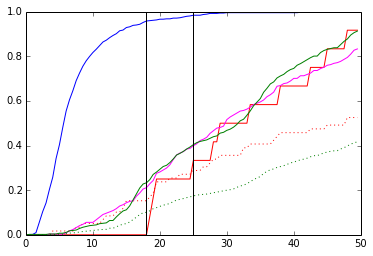

In [46]:
#sweet
#now I want to plot the distance to nearest WvW neighbor for these different pops
#will also want to separate spring sky LG gals
#want to do this as cumulative distribution function - is there an easy way to do this in matplotlib?
values_wvw, bins = np.histogram(wvw_dist['dist_wvw'], bins=100,range=(0,50))
n_wvw= float(len(wvw_dist['dist_wvw']))
cum_wvw = np.cumsum(values_wvw)

values_gals, bins = np.histogram(lg_wvw['WvW'], bins=100,range=(0,50))
cum_gals = np.cumsum(values_gals)/float(len(lg_wvw))

values_cands,bins = np.histogram(spring_cands_wvw['WvW'], bins=100,range=(0,50))
cum_cands = np.cumsum(values_cands)/float(len(spring_cands_wvw))

#get spring gals only:
values_spring_gals, bins = np.histogram(lg_spring_wvw['WvW'], bins=100,range=(0,50))
cum_spring_gals = np.cumsum(values_spring_gals)/float(len(lg_spring_wvw))
            
values_code9s,bins = np.histogram(code9s['WvW'], bins=100,range=(0,50))
cum_code9s = np.cumsum(values_code9s)/float(len(code9s))


values_spring_code9s,bins = np.histogram(spring_code9s['WvW'], bins=100,range=(0,50))
cum_spring_code9s = np.cumsum(values_spring_code9s)/float(len(spring_code9s))
    
# plot the cumulative function
plt.plot(bins[:-1], cum_wvw/n_wvw, c='blue')
plt.plot(bins[:-1],cum_gals,'r:')
plt.plot(bins[:-1],cum_spring_gals,'r')

plt.plot(bins[:-1],cum_cands,c='magenta')

plt.plot(bins[:-1],cum_code9s,'g:')
plt.plot(bins[:-1],cum_spring_code9s,'g')

plt.plot([25,25],[0,1],'k')
plt.plot([18,18],[0,1],'k')



In [6]:
#now do a bunch of distance calcs all at once
n=[1,3,5,7,11,1,3,5,7,11,1,3,5,7,11,1,3,5,7,11]
f=[0.2,0.2,0.2,0.2,0.2,0.5,0.5,0.5,0.5,0.5,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1]
dist_cands=alfalfa.add_col_neigh_dist(cands,code9s,Nth=n,fv=f)


ERROR: NameError: name 'cands' is not defined [IPython.core.interactiveshell]


NameError: name 'cands' is not defined

In [ ]:
#now let's make some plots!
#plot cdf for different dist values

#values, base = np.histogram(data, bins=40)
#evaluate the cumulative
#cumulative = np.cumsum(values)
# plot the cumulative function
#plt.plot(base[:-1], cumulative, c='blue')

sorted_N3_f_2=np.sort(distcat['N3_f0.2'])
sorted_N3_f_1=np.sort(distcat['N3_f0.1'])
sorted_N3_f_5=np.sort(distcat['N3_f0.5'])
sorted_N3_f1=np.sort(distcat['N3_f1'])

# Cumulative distributions:
plt.step(sorted_N3_f_2, np.arange(sorted_N3_f_2.size),label='f=0.2')  # From 0 to the number of data points-1
#plt.step(sorted_data[::-1], np.arange(sorted_data.size))  # From the number of data points-1 to 0
plt.step(sorted_N3_f_1, np.arange(sorted_N3_f_1.size),label='f=0.1')
plt.step(sorted_N3_f_5, np.arange(sorted_N3_f_5.size),label='f=0.5')
plt.step(sorted_N3_f1, np.arange(sorted_N3_f1.size),label='f=1')

plt.axis((0,60,0,350))
plt.legend()

plt.show()

In [3]:
name='/Users/adams/data/uchvcs/catalog/spring/spring_candidates.csv'
spring_cands=alfalfa.get_cat(name)

In [4]:
print spring_cands

 AGC         HIname            RA      ...     hsize     flux  SN 
------ ----------------- ------------- ... ------------- ---- ----
174540 HI074559.9+145850 116.501666667 ... 7.93725393319  2.2 29.1
    -- HI074824.2+021738     117.10125 ... 11.1579568022 0.74  0.0
174728 HI075149.4+064516       117.955 ...  4.7021271782 0.19  4.1
174541 HI075437.8+143239 118.659583333 ... 7.18261790714 2.27 26.5
    -- HI075522.6+025152       118.845 ... 5.90423576765 0.53  0.0
188988 HI080238.1+052552      120.6575 ... 3.65102725271 0.41  0.0
    -- HI080245.0+030115     120.68875 ... 9.29838695689 0.55  4.7
    -- HI080312.3+264257 120.806666667 ... 12.6510869098 1.02  9.5
    -- HI080750.9+021518      121.9625 ...  6.5574385243 0.33  5.1
    -- HI081006.0+285826 122.531666667 ... 8.61162005664 0.83  9.3
189029 HI081153.6+280111 122.977083333 ...  7.4296702484 1.55 17.6
   ...               ...           ... ...           ...  ...  ...
268242 HI162009.9+260439      245.0475 ...           3.0 0.25 

In [ ]:
tmp=4
print tmp

In [15]:
print min(code9s['vdev']),max(code9s['vdev'])
print len(np.where(code9s['vdev'] == 0)[0])
print min(abs(code9s['vdev']))

-454.217788991 342.90791439
3
0.0
